In [1]:
# ResNet50 for Sugarcane Dataset

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from glob import glob
import os

# Paths
sugarcane_path = '../Datasets/Sugarcane_leafs/'
IMAGE_SIZE = [224, 224]

# Load base model
resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# Freeze layers
for layer in resnet.layers:
    layer.trainable = False

# Output layer
folders = glob(sugarcane_path + '/*')
x = Flatten()(resnet.output)
prediction = Dense(len(folders), activation='softmax')(x)

model = Model(inputs=resnet.input, outputs=prediction)

# Summary
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [2]:
# Compile
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Data generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

train_set = train_datagen.flow_from_directory(
    sugarcane_path,
    target_size=IMAGE_SIZE,
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

valid_set = train_datagen.flow_from_directory(
    sugarcane_path,
    target_size=IMAGE_SIZE,
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# Train
r = model.fit(
    train_set,
    validation_data=valid_set,
    epochs=10,
    steps_per_epoch=len(train_set),
    validation_steps=len(valid_set)
)

Found 15943 images belonging to 6 classes.
Found 3983 images belonging to 6 classes.
Epoch 1/10
499/499 [==============================] - 1673s 3s/step - loss: 2.1632 - accuracy: 0.3634 - val_loss: 1.8261 - val_accuracy: 0.3894
Epoch 2/10
499/499 [==============================] - 1653s 3s/step - loss: 1.9241 - accuracy: 0.4287 - val_loss: 1.3876 - val_accuracy: 0.5087
Epoch 3/10
499/499 [==============================] - 1553s 3s/step - loss: 1.6138 - accuracy: 0.4722 - val_loss: 1.3888 - val_accuracy: 0.5536
Epoch 4/10
499/499 [==============================] - 1570s 3s/step - loss: 1.6644 - accuracy: 0.4783 - val_loss: 1.3178 - val_accuracy: 0.5704
Epoch 5/10
499/499 [==============================] - 1294s 3s/step - loss: 1.6630 - accuracy: 0.4934 - val_loss: 1.1216 - val_accuracy: 0.5908
Epoch 6/10
499/499 [==============================] - 1592s 3s/step - loss: 1.5447 - accuracy: 0.5146 - val_loss: 1.1835 - val_accuracy: 0.5451
Epoch 7/10
499/499 [==============================]

In [3]:
# Evaluation
loss, accuracy = model.evaluate(valid_set)
print(f"Validation Loss: {loss}")
print(f"Validation Accuracy: {accuracy}")

125/125 [==============================] - 190s 2s/step - loss: 0.9410 - accuracy: 0.6402
Validation Loss: 0.9409902691841125
Validation Accuracy: 0.6402209401130676


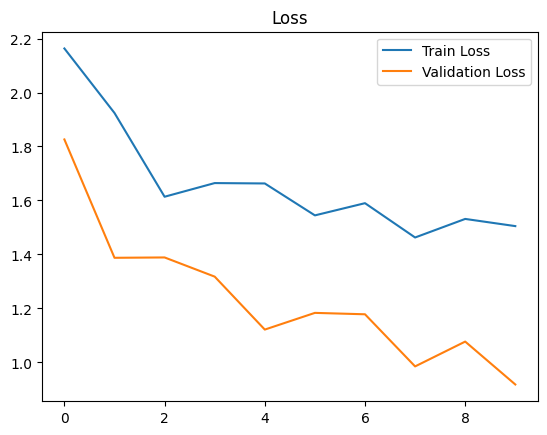

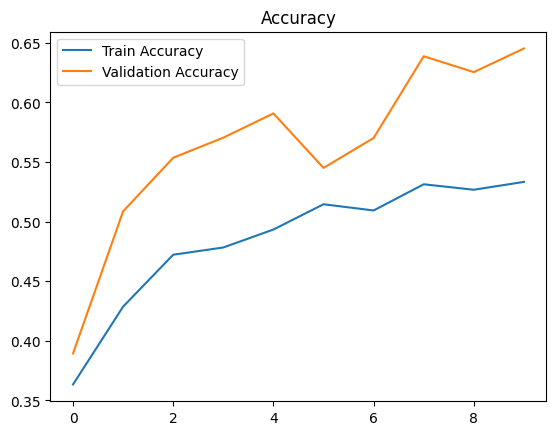

In [4]:
# Plots
plt.plot(r.history['loss'], label='Train Loss')
plt.plot(r.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')
plt.show()

plt.plot(r.history['accuracy'], label='Train Accuracy')
plt.plot(r.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')
plt.show()

In [5]:
# Save
model.save('../Models/sugarcane_resnet_model.h5')